-------------------

### Question 11: Summaryof Metadata

Dataset: "Onine Retail.xlsx"<br>
Downloaded from: https://archive.ics.uci.edu/ml/datasets/online+retail

- Transactional dataset for a UK based and registered non-store online retail
- Company aminly sells unique all occasion gifts
- Company cutomers are wholesalers
- Data of Transaction between 01/12/2010 and 09/12/2011

Attribute Information:

- InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
- StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
- Description: Product (item) name. Nominal.
- Quantity: The quantities of each product (item) per transaction. Numeric.
- InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
- UnitPrice: Unit price. Numeric, Product price per unit in sterling.
- CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
- Country: Country name. Nominal, the name of the country where each customer resides.

Data Set Characteristics:  Multivariate, Sequential, Time-Series

Number of Instances: 541909

Area: Business

Attribute Characteristics: Integer, Real

Number of Attributes: 8

Date Donated: 2015-11-06

Associated Tasks: Classification, Clustering

Missing Values?: N/A

Number of Web Hits: 675708

-------

---

#### Importing

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df1 = pd.read_excel("Online Retail.xlsx")

In [ ]:
df1['InvoiceDate'] = pd.to_datetime(df1["InvoiceDate"])

In [ ]:
df1["InvoiceDate"]

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
541904   2011-12-09 12:50:00
541905   2011-12-09 12:50:00
541906   2011-12-09 12:50:00
541907   2011-12-09 12:50:00
541908   2011-12-09 12:50:00
Name: InvoiceDate, Length: 541909, dtype: datetime64[ns]

---

---

### Question 12: Transactions  that have occurred from 01/04/ 2011 and 09/12/2011

In [ ]:
df = df1.loc[((df1['InvoiceDate'] >= '2011-4-1') & 
             (df1['InvoiceDate'] < '2011-12-10'))]

In [ ]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
142083,548550,22662,LUNCH BAG DOLLY GIRL DESIGN,10,2011-04-01 08:22:00,1.65,18161.0,United Kingdom
142084,548550,22296,HEART IVORY TRELLIS LARGE,12,2011-04-01 08:22:00,1.65,18161.0,United Kingdom
142085,548550,21790,VINTAGE SNAP CARDS,12,2011-04-01 08:22:00,0.85,18161.0,United Kingdom
142086,548550,22622,BOX OF VINTAGE ALPHABET BLOCKS,2,2011-04-01 08:22:00,9.95,18161.0,United Kingdom
142087,548550,22393,PAPERWEIGHT VINTAGE COLLAGE,6,2011-04-01 08:22:00,2.55,18161.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [ ]:
df.shape

(399826, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 399826 entries, 142083 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    399826 non-null  object        
 1   StockCode    399826 non-null  object        
 2   Description  398841 non-null  object        
 3   Quantity     399826 non-null  int64         
 4   InvoiceDate  399826 non-null  datetime64[ns]
 5   UnitPrice    399826 non-null  float64       
 6   CustomerID   309882 non-null  float64       
 7   Country      399826 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.5+ MB


In [ ]:
df.dropna(axis = 0, inplace = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 309882 entries, 142083 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    309882 non-null  object        
 1   StockCode    309882 non-null  object        
 2   Description  309882 non-null  object        
 3   Quantity     309882 non-null  int64         
 4   InvoiceDate  309882 non-null  datetime64[ns]
 5   UnitPrice    309882 non-null  float64       
 6   CustomerID   309882 non-null  float64       
 7   Country      309882 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 21.3+ MB


---

---

### Question 13: RFM
  - R: Recency
  - F: Frequency
  - M: Monetary Value

---

Calculating Recency for each Customer (by CustomerID)

By the given definition, Recency (R) can be calculated by the formula of 12 - month of purchase

In [ ]:
df['Recency'] = 12 - df.InvoiceDate.dt.month

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df.Recency

142083    8
142084    8
142085    8
142086    8
142087    8
         ..
541904    0
541905    0
541906    0
541907    0
541908    0
Name: Recency, Length: 309882, dtype: int64

In [ ]:
Recency = df[['CustomerID', 'Recency']].groupby(by = 'CustomerID').min()

Confirming the number of customer ids for which recncy is calculted against total unique customers for the given dataset

In [ ]:
Recency.shape[0] == df.CustomerID.unique().shape[0]

True

In [ ]:
Recency = Recency.reset_index()

In [ ]:
Recency.shape

(3875, 2)

In [ ]:
Recency.head()

,CustomerID,Recency
0,12347.0,0
1,12348.0,3
2,12349.0,1
3,12352.0,1
4,12353.0,7


In [ ]:
df.drop('Recency', axis = 1, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


---

Calculating Frequency

In [ ]:
F = df.groupby('CustomerID')['InvoiceNo'].count()
F = F.reset_index()
F.columns = ['CustomerID','Frequency']
F

,CustomerID,Frequency
0,12347.0,122
1,12348.0,8
2,12349.0,73
3,12352.0,47
4,12353.0,4
...,...,...
3870,18278.0,9
3871,18281.0,7
3872,18282.0,13
3873,18283.0,624


---

Calculating Monetary Value

In [ ]:
df['Total'] = (df['Quantity'] * df['UnitPrice'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total
142083,548550,22662,LUNCH BAG DOLLY GIRL DESIGN,10,2011-04-01 08:22:00,1.65,18161.0,United Kingdom,16.5
142084,548550,22296,HEART IVORY TRELLIS LARGE,12,2011-04-01 08:22:00,1.65,18161.0,United Kingdom,19.8
142085,548550,21790,VINTAGE SNAP CARDS,12,2011-04-01 08:22:00,0.85,18161.0,United Kingdom,10.2
142086,548550,22622,BOX OF VINTAGE ALPHABET BLOCKS,2,2011-04-01 08:22:00,9.95,18161.0,United Kingdom,19.9
142087,548550,22393,PAPERWEIGHT VINTAGE COLLAGE,6,2011-04-01 08:22:00,2.55,18161.0,United Kingdom,15.3


In [ ]:
M = df.groupby('CustomerID')['Total'].sum()
M = pd.DataFrame(M).reset_index()

In [ ]:
M

,CustomerID,Total
0,12347.0,3122.82
1,12348.0,677.00
2,12349.0,1757.55
3,12352.0,944.23
4,12353.0,89.00
...,...,...
3870,18278.0,173.90
3871,18281.0,80.82
3872,18282.0,176.60
3873,18283.0,1776.98


---

---

### Question 14: Elbow Method

In [ ]:
RF = pd.merge(Recency, F, on = 'CustomerID')

In [ ]:
RF

,CustomerID,Recency,Frequency
0,12347.0,0,122
1,12348.0,3,8
2,12349.0,1,73
3,12352.0,1,47
4,12353.0,7,4
...,...,...,...
3870,18278.0,3,9
3871,18281.0,6,7
3872,18282.0,0,13
3873,18283.0,0,624


In [ ]:
RFM = pd.merge(RF, M, on = 'CustomerID')

In [ ]:
RFM

,CustomerID,Recency,Frequency,Total
0,12347.0,0,122,3122.82
1,12348.0,3,8,677.00
2,12349.0,1,73,1757.55
3,12352.0,1,47,944.23
4,12353.0,7,4,89.00
...,...,...,...,...
3870,18278.0,3,9,173.90
3871,18281.0,6,7,80.82
3872,18282.0,0,13,176.60
3873,18283.0,0,624,1776.98


In [ ]:
RFM = RFM.drop('CustomerID', axis = 1)

In [ ]:
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k) 
    km = km.fit(RFM)
    Sum_of_squared_distances.append(km.inertia_)

In [ ]:
Sum_of_squared_distances

[173797984779.19897,
 57383923068.81351,
 25801017083.05861,
 16982190755.20041,
 10035621714.874517,
 7590276689.63398,
 5414549931.215885,
 3737609688.1775455,
 2810671425.491757]

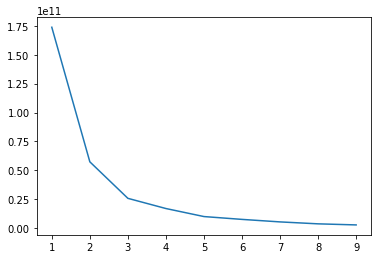

In [ ]:
plt.plot( [x for x in range(1,10)], Sum_of_squared_distances )
plt.show()

We can see a clear elbow at 3. Hence K = 3 is the optimum value of k.Thus there are 3 clusters

---

---

### Question 15: Creating cluster segments

In [ ]:
KMeans_model = KMeans(n_clusters = 3)
predictions = KMeans_model.fit_predict(RFM)

In [ ]:
print(predictions)

[2 2 2 ... 2 2 2]


### Question 16: Plotting

In [ ]:
clusters = KMeans_model.labels_

In [ ]:
RFM['labels'] = predictions

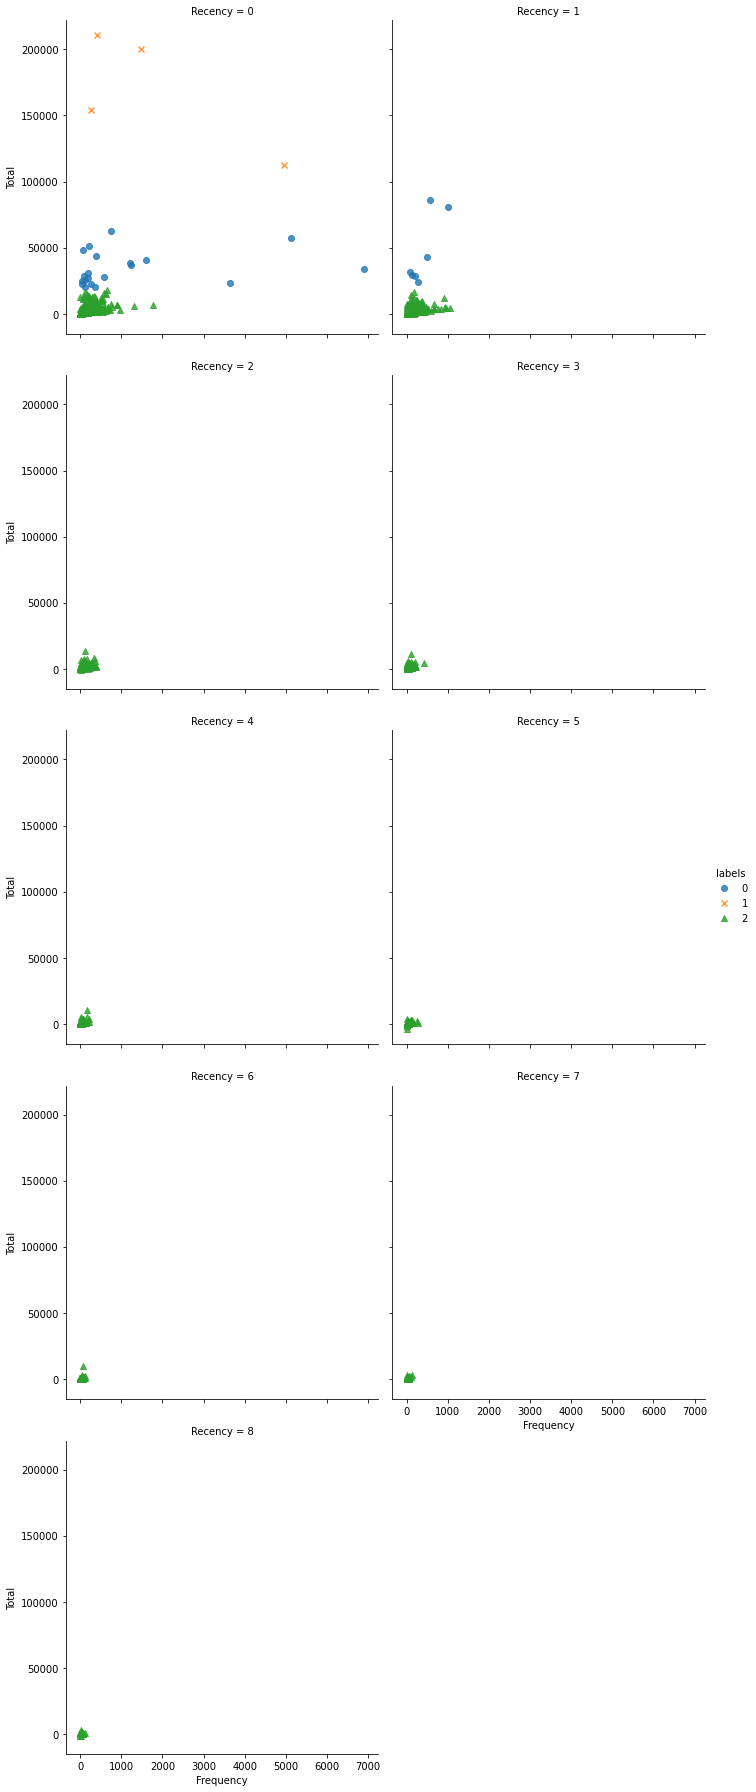

In [ ]:
sns.lmplot(x='Frequency', y='Total', col='Recency', 
           hue='labels', data=RFM, 
           col_wrap=2, fit_reg=False, 
           markers=['o', 'x', '^'])

### Question 17:

In [ ]:
print(KMeans_model.cluster_centers_)

[[2.59259259e-01 9.60407407e+02 3.73294022e+04]
 [0.00000000e+00 1.77575000e+03 1.69562410e+05]
 [2.29812695e+00 7.20208117e+01 1.18827605e+03]]


In [ ]:
RFM.columns

Index(['Recency', 'Frequency', 'Total', 'labels'], dtype='object')

Ignoring the just added labels column, We created the cluster using Recency, Frequency, Total. 

#### Cluster 0:
<br>
When comparing to other cluster centres, we find that the recency of this group is the highest(worst), Total amount spent is least, and their frequency is the least. This group of customers can thus be classified as having already stopped visiting/ in danger of stopping further purchases at the store.

#### Cluster 1:
<br>
When comparing to other clusters it is apparent that this group has the lowest recency(best), amount spent is the highest, frequency of visits is the highest.All of these indicate that this group or customers are loyal customers.

#### Cluster 2:
<br>
Finally with this cluster, The values seem to be between the other 2 clusters. These customers are either New  customers which wanted to try out the store, or are customers which visit other stores much like this one. 



### Question 18

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
AggCluster = AgglomerativeClustering(n_clusters = 3, compute_distances = True)

In [ ]:
RFM = RFM.drop('labels', axis = 1)

In [ ]:
model = AggCluster.fit(RFM)

### Question 19:

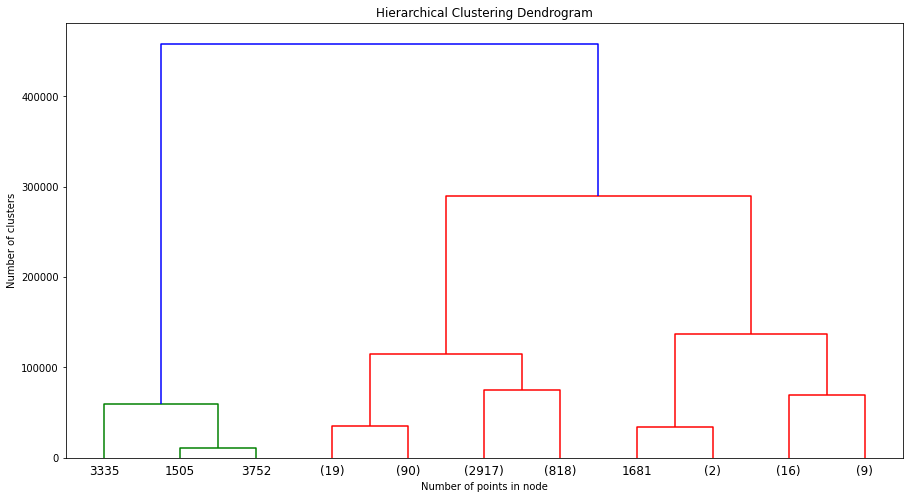

In [ ]:
from scipy.cluster.hierarchy import dendrogram
def plot_dendrogram(model, **kwargs):
    
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)

    dendrogram(linkage_matrix, **kwargs)
    

plt.figure(figsize=(15,8))
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel('Number of points in node')
plt.ylabel('Number of clusters')
plt.show()

### Question 20:

In [61]:
labels = model.labels_

In [65]:
(clusters == labels).sum()

3874

In [66]:
clusters.shape[0]

3875

In [67]:
(clusters != labels).sum()

1

As we can see above, The clusters made by both Kmeans and Agglomerative clustering for the given data are almost the same with an exception of customer being classified differently. This customer is:

In [74]:
RF[(clusters != labels)]['CustomerID']

1681    14911.0
Name: CustomerID, dtype: float64

In [76]:
print("RFM of customer 14911")
RFM[(clusters != labels)]

RFM of customer 14911


,Recency,Frequency,Total
1681,0,4959,112420.25


In [77]:
print("this customer was classified as", clusters[(clusters != labels)], "in Kmeans and as",  
      model.labels_[(clusters != labels)], "in Agglomerative Clustering")

this customer was classified as [1] in Kmeans and as [0] in Agglomerative Clustering


As we can see, recency as 0, moderate frequency, High spending. It is due to the moderate frequency that this discrepancy has occured between the two models